<a href="https://colab.research.google.com/github/MUMADE-TADM/s1_python-rdvicen1/blob/main/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión
Sea una colección de datos $x_i \in R^n$ para $i=0,\ldots,l$ y un vector de etiquetas $y \in R^l$

Consideremos $Q$ los datos del nodo $m$ y el citerio de partición $\theta=(j,t_m)$ sobre la característica $j$ y el valor de corte $t_m$ que divide el nodo $Q$ en los dos subconjuntos:

- $Q_{izquierda}(\theta)$ definido como $\{x \in Q / x_j \le t_m\}$ 
- $Q_{derecha}(\theta)$ definido como $\{x \in Q / x_j > t_m\}$ 

La valoración de criterio  $\theta$ en el nodo $Q$ se calcula como:
- $G(Q,\theta)=\frac{n_{izquierdo}}{Q} H(Q_{izquierdo})+ \frac{n_{derecho}}{Q} H(Q_{derecho})$

Se selecciona el parámtero $\theta^*$ pare que $G(\theta^*,Q)$ sea mínimo.

De forma recursiva se vuelve a subdivir $Q_{izquierdo}$ y $Q_{derecho}$ hasta alcanzar unos conjuntos unitarios o el criterio para subdividir no se cumpla.

# Clasificación $H(Q)$
Evaluación de la uniformidad de un nodo.

Consideramos la probabilidad de la clase k en el nodo $Q_m$ es $p_{m,k}=\frac{1}{N_m} \sum_{x_i \in Q_m} I(y_i=k)$


|**Criterio**       |   **Valor**                                              |
|-------------------|----------------------------------------------------------|
|**Gini**           |$H(Q_m)=\sum_k p_{m,k}(1-p_{m,k})$                        |
|-------------------|----------------------------------------------------------|
|**Entropía**       |$H(Q_m)=-\sum_k p_{m,k}log(p_{m,k})$                      |
|-------------------|----------------------------------------------------------|
|**Mal clasificación**|$H(Q_m)=1-max(p_{m,k})$                                 |
|-------------------|----------------------------------------------------------|




# Ejemplo de divisiones $\theta$
Datos de flores Iris

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
#leemos los datos
iris = load_iris()

Creamos el DataFrame  **datos** correspondientes a partir de la librería **sklearn**

|                 | Características|                 |                |       |
|-----------------|----------------|-----------------|----------------|-------|
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)| tipos |



|Tipos|Clase      |
|-----|-----------|
0    |setosa
1    |versicolor
2    |virginia


In [ ]:
datos=pd.DataFrame(iris.data,columns=iris.feature_names)
datos['tipos']=pd.Series(iris.target)
datos.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipos
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Probar una división sobre la característica **sepal length (cm)**

Ver como se distribuyen los valores de la característica

histograma para distribución de frecuencias

columna 0 sepal lenght

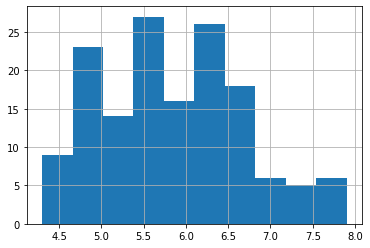

In [ ]:
caracteristica=iris.feature_names[0] # Columna 0 'sepal lenght (cm)'
datos[caracteristica].hist()

Utilizamos el valor 6 para realizar la partición

- $Q_{izqierdo}=\{x \in datos| x[sepal\ leng (cm)] \le 6\}$
- $Q_{derecho}=\{x \in datos| x[sepal\ leng (cm)] > 6\}$

Se utiliza la función [**cut**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) de la librería **pandas** que segmenta una serie en intervalos.

En ejemplo se proponen dos intervalo :
- Izquierdo (0,6]
- Derecho (6,8]

funcion cut para cortar datos según sepal lenght

dv izq y derecha en los intervalos que se dividen

In [ ]:
from pandas._libs.interval import Interval
corte=6
dv=pd.cut(datos[caracteristica],[0,corte,8])
dv_izquierdo=datos[dv==Interval(0, corte, closed='right')]
dv_derecho=datos[dv==Interval(corte, 8, closed='right')]
len(dv_izquierdo),len(dv_derecho),len(datos)

(89, 61, 150)

Valoramos los nodos obtenido **dv_izquierdo** y **dv_derecho**
- Obtenemos la probabilidad de cada clase $p_{m,k}$ haciendo uso de [**groupby**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby) y **count** de **pandas**

se calculan las probabilidad, por lo que hay que agrupar por clases y despues obtener probabilidades.

In [ ]:
Nodo=dv_izquierdo
sdv=Nodo.groupby('tipos',as_index=False).count()
nizq=len(Nodo)
sdv['Prob']=sdv[caracteristica]/nizq
lpizq=sdv['Prob'].values
sdv

,tipos,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Prob
0,0,50,50,50,50,0.561798
1,1,30,30,30,30,0.337079
2,2,9,9,9,9,0.101124


count cuenta cuantos de cada tipo; 50/89= 0.5617

In [ ]:
Nodo=dv_derecho
sdv=Nodo.groupby('tipos',as_index=False).count()
nder=len(Nodo)
sdv['Prob']=sdv[caracteristica]/nder
lpder=sdv['Prob'].values
sdv

,tipos,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Prob
0,1,20,20,20,20,0.327869
1,2,41,41,41,41,0.672131


Valoramos la partición:
- Calculamos el valor de disparidad en cada nodo: Gini, Entropía y mal clasificación.

zip de 2 listas te genera una unica lista 

In [ ]:
def Gini (l_probabilidades):
  s=0.0
  for p in l_probabilidades:
    s = s + p*(1-p)
  return s

def Entropia(l_probabilidades):
  s = 0.0
  log_list= np.log(l_probabilidades)
  for (p,plog) in zip(l_probabilidades,log_list):
    s= s +p *plog
  return - s

def MClasificacion(l_probabilidades):
  return 1-max(l_probabilidades)

Valoración utilizando el criterio **gini**

In [ ]:
print(f'Gini(lpizq)={Gini(lpizq)}\nGini(lpder)={Gini(lpder)}\nG(izq,(sepal,6))={(nizq/(nizq+nder))*Gini(lpizq)+(nder/(nizq+nder))*Gini(lpder)}')

Gini(lpizq)=0.5605352859487438
Gini(lpder)=0.44074173609244827
G(izq,(sepal,6))=0.511819242340517


Valoración utilizando la **entropía**

In [ ]:
print(f'Entropia(lpizq)={Entropia(lpizq)}\nEntropia(lpder)={Entropia(lpder)}\nG(izq,(sepal,6))={(nizq/(nizq+nder))*Entropia(lpizq)+(nder/(nizq+nder))*Entropia(lpder)}')

Entropia(lpizq)=0.9222083594254213
Entropia(lpder)=0.6326591066986156
G(izq,(sepal,6))=0.804458329983187


Valoración utilizando la **mal clasificación**

In [ ]:
print(f'Entropia(lpizq)={MClasificacion(lpizq)}\nEntropia(lpder)={MClasificacion(lpder)}\nG(izq,(sepal,6))={(nizq/(nizq+nder))*MClasificacion(lpizq)+(nder/(nizq+nder))*MClasificacion(lpder)}')

Entropia(lpizq)=0.4382022471910112
Entropia(lpder)=0.3278688524590164
G(izq,(sepal,6))=0.39333333333333337


# Scikit-Learn [Árboles de decisión](https://scikit-learn.org/stable/modules/tree.html)

**Árboles de clasificación** \( [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)\)


- **Leemos** los datos
- **Importamos** toda la funcionalidad de los árboles \(**tree**\)
- **Creamos** el árbol de decisión para clasificar.
- Lo instanciamos \(**aprendemos**\) con los datos **X** y sus clase **y**

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

ajuste en clf con modelo fit

ahora estamos con aprendizaje supervisado, ya que se necesitan las x y las clases por separado

cluster era no supervisado

Mostramos el árbol obtenido

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

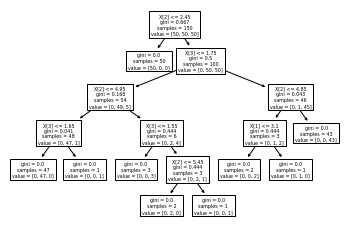

In [ ]:
tree.plot_tree(clf)

Predecimos como con cualquier modelo 

In [ ]:
clf.predict(X)!=y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Podemos exporta el gráfico del árbol aun fichero **pdf** con el uso de la librería [**graphviz**](https://pypi.org/project/graphviz/)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

La exportación puede ser más *sofisticada* y a distintos *formatos*

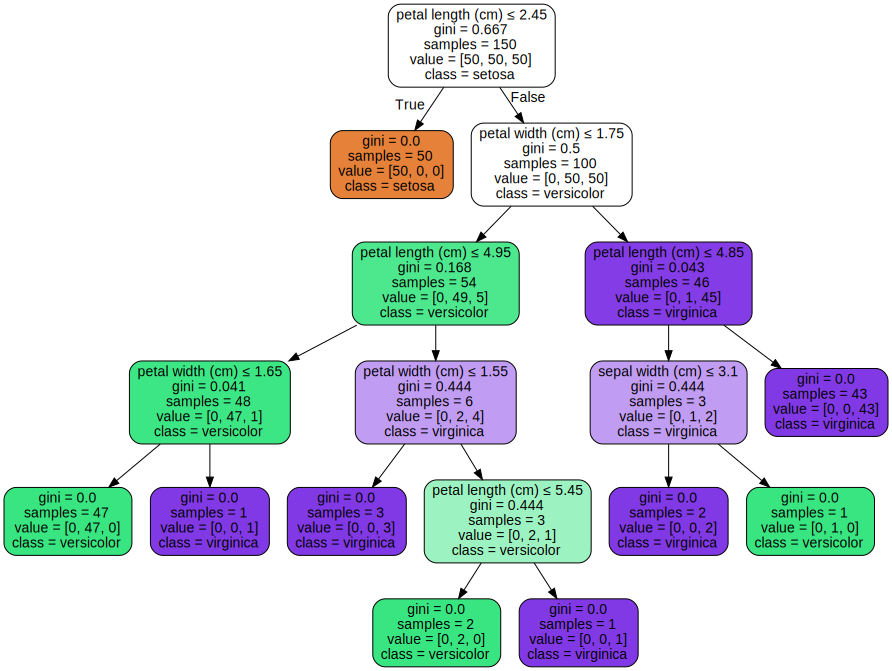

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph

O como *texto*

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



# [**Orange**](https://orange.biolab.si/) un entorno integrado **Open Source**
Como hacernos la vida un poco más fácil